### libraries

In [581]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

#Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor

#evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Dataset

In [787]:
df = pd.read_csv("biogasdf_ready.csv", parse_dates=['date'])
df['Month'] = df['date'].dt.month
df['Hour'] = pd.to_datetime(df['hour'], format='%H:%M:%S').dt.hour

#### Aggregating using group function with respect to hour

In [788]:
df_hour = df.groupby('hour').mean().reset_index()

In [789]:
df_hour = df_hour.fillna(5)
df_hour.head()

,hour,date,fluid_temp,ground_temp,air_umidity,air_temp,gas_umidity,gas_temp,dm3_gas,bio_id,phase_test,Month,Hour
0,00:00:00,2021-11-08 00:00:00,18.942500,-17.657500,94.35,15.300000,90.0925,14.8275,0.000,1.500000,1.000000,11.000000,0.0
1,00:00:02,2022-05-14 00:00:00,20.090000,18.905000,95.90,14.500000,5.0000,5.0000,0.000,1.500000,3.000000,5.000000,0.0
2,00:00:03,2022-01-04 08:00:00,21.563333,21.836667,99.50,15.366667,84.5800,16.4700,0.000,1.333333,0.666667,4.666667,0.0
3,00:00:08,2022-06-26 00:00:00,17.130000,15.785000,93.90,13.500000,5.0000,5.0000,0.005,1.500000,3.000000,6.000000,0.0
4,00:00:16,2021-12-21 00:00:00,22.440000,22.120000,91.60,17.400000,5.0000,5.0000,0.000,1.500000,1.000000,12.000000,0.0


In [840]:
# Lets get the range of the each features
columns = ["fluid_temp", "ground_temp", "air_umidity", "air_temp", "gas_umidity", "gas_temp"]
for col in columns:
    print(f" {col}  Minimum Value : {df_hour[col].min()},  Maximum Value: {df_hour[col].max()} change_value: {df_hour[col].max()-df[col].min()}")

 fluid_temp  Minimum Value : -53.0,  Maximum Value: 24.215 change_value: 151.215
 ground_temp  Minimum Value : -54.405,  Maximum Value: 23.97 change_value: 150.97
 air_umidity  Minimum Value : 13.9,  Maximum Value: 99.90000000000002 change_value: 99.90000000000002
 air_temp  Minimum Value : 1.3,  Maximum Value: 52.6 change_value: 52.6
 gas_umidity  Minimum Value : 5.0,  Maximum Value: 110.49 change_value: 78.77
 gas_temp  Minimum Value : -12.17,  Maximum Value: 120.79 change_value: 133.41


In [790]:
df_hour.dm3_gas = round(df_hour['dm3_gas']*1000, 2)
df_hour.dm3_gas.value_counts()

dm3_gas
0.00     18040
5.00      1756
2.50       376
3.33       149
10.00      117
1.67        51
2.00        30
6.67        13
4.00         9
1.43         7
1.25         6
7.50         2
3.75         1
1.11         1
1.00         1
Name: count, dtype: int64

#### Extracting variables values that cobntribute to maximum gas production

In [792]:
df_hour_max = df_hour[df_hour.dm3_gas==10]

In [804]:
df_hour_max.head(10)

,hour,date,fluid_temp,ground_temp,air_umidity,air_temp,gas_umidity,gas_temp,dm3_gas,bio_id,phase_test,Month,Hour
982,01:10:26,2022-03-20,23.375,23.220,96.1,17.7,87.48,17.03,10.0,1.5,2.0,3.0,1.0
1237,01:27:58,2022-03-06,23.845,23.565,96.6,22.9,86.91,21.96,10.0,1.5,2.0,3.0,1.0
1529,01:48:14,2022-03-19,23.340,23.250,97.6,21.0,86.40,19.99,10.0,1.5,2.0,3.0,1.0
1848,02:10:28,2022-03-20,23.345,23.220,96.7,18.0,88.60,17.38,10.0,1.5,2.0,3.0,2.0
3292,03:53:27,2022-03-16,23.660,23.500,98.5,18.9,86.53,18.04,10.0,1.5,2.0,3.0,3.0
3688,04:22:20,2022-03-09,24.065,23.785,97.2,20.7,86.54,19.65,10.0,1.5,2.0,3.0,4.0
4066,04:48:13,2022-03-19,23.340,23.250,99.0,21.0,86.89,20.15,10.0,1.5,2.0,3.0,4.0
4071,04:48:36,2022-03-19,23.340,23.250,99.0,21.0,86.89,20.15,10.0,1.5,2.0,3.0,4.0
4148,04:53:30,2022-03-16,23.660,23.500,99.2,18.9,86.61,18.15,10.0,1.5,2.0,3.0,4.0
4388,05:10:34,2022-03-20,23.345,23.185,97.1,17.5,89.68,16.52,10.0,1.5,2.0,3.0,5.0


In [801]:
for col in df_hour_max.columns:
    print(col)
    print(f"{(df_hour_max[col].nunique())} distinct values")

hour
117 distinct values
date
33 distinct values
fluid_temp
47 distinct values
ground_temp
46 distinct values
air_umidity
88 distinct values
air_temp
79 distinct values
gas_umidity
91 distinct values
gas_temp
90 distinct values
dm3_gas
1 distinct values
bio_id
2 distinct values
phase_test
4 distinct values
Month
6 distinct values
Hour
23 distinct values


In [806]:
for col in df_hour_max.columns:
    print(col)
    print(df_hour_max[col].max())
    print(df_hour_max[col].min())

hour
23:49:46
01:10:26
date
2022-05-07 00:00:00
2021-05-03 00:00:00
fluid_temp
24.155
14.38
ground_temp
23.97
15.12
air_umidity
99.9
46.7
air_temp
37.6
9.5
gas_umidity
91.87
5.0
gas_temp
49.45
5.0
dm3_gas
10.0
10.0
bio_id
1.5
1.0
phase_test
3.0
0.0
Month
12.0
1.0
Hour
23.0
1.0


In [807]:
for col in df_hour.columns:
    print(col)
    print(df_hour_max[col].max())
    print(df_hour_max[col].min())

hour
23:49:46
01:10:26
date
2022-05-07 00:00:00
2021-05-03 00:00:00
fluid_temp
24.155
14.38
ground_temp
23.97
15.12
air_umidity
99.9
46.7
air_temp
37.6
9.5
gas_umidity
91.87
5.0
gas_temp
49.45
5.0
dm3_gas
10.0
10.0
bio_id
1.5
1.0
phase_test
3.0
0.0
Month
12.0
1.0
Hour
23.0
1.0


## ******************************* MODEL 1 *************************

In [879]:
df = pd.read_csv("biogasdf_ready.csv", parse_dates=['date'])
df['Month'] = df['date'].dt.month
df['Hour']= pd.to_datetime(df['hour'], format='%H:%M:%S').dt.hour

In [880]:
df_hour = df.groupby('hour').mean().reset_index()

In [881]:
df_hour = df_hour.drop(columns = ["date", "hour"], axis=1)

In [882]:
# imputing the null values using the mean of each variable to avoid -inf after logging the values "np.log"
for col in df_hour.columns:
    df_hour = df_hour.fillna(df_hour[col].mean())

In [883]:
df_hour.isna().sum()

fluid_temp     0
ground_temp    0
air_umidity    0
air_temp       0
gas_umidity    0
gas_temp       0
dm3_gas        0
bio_id         0
phase_test     0
Month          0
Hour           0
dtype: int64

In [884]:
df_hour.columns

Index(['fluid_temp', 'ground_temp', 'air_umidity', 'air_temp', 'gas_umidity',
       'gas_temp', 'dm3_gas', 'bio_id', 'phase_test', 'Month', 'Hour'],
      dtype='object')

In [885]:
# get the positive values to avoid "-inf"

df_hour_pos  = df_hour.loc[df_hour['fluid_temp'] > 0]
df_hour_pos  = df_hour_pos.loc[df_hour_pos['ground_temp'] > 0]
df_hour_pos  = df_hour_pos.loc[df_hour_pos['gas_temp'] > 0]

In [886]:
# check for negative values
(df_hour_pos<0).sum()

fluid_temp     0
ground_temp    0
air_umidity    0
air_temp       0
gas_umidity    0
gas_temp       0
dm3_gas        0
bio_id         0
phase_test     0
Month          0
Hour           0
dtype: int64

In [887]:
X =df_hour_pos.drop(columns = ['dm3_gas'], axis=1)

y = df_hour_pos['dm3_gas']

In [888]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20559 entries, 0 to 20558
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fluid_temp   20559 non-null  float64
 1   ground_temp  20559 non-null  float64
 2   air_umidity  20559 non-null  float64
 3   air_temp     20559 non-null  float64
 4   gas_umidity  20559 non-null  float64
 5   gas_temp     20559 non-null  float64
 6   dm3_gas      20559 non-null  float64
 7   bio_id       20559 non-null  float64
 8   phase_test   20559 non-null  float64
 9   Month        20559 non-null  float64
 10  Hour         20559 non-null  float64
dtypes: float64(11)
memory usage: 1.7 MB


In [889]:
print(X.shape)
print(X.isna().sum())

(19056, 10)
fluid_temp     0
ground_temp    0
air_umidity    0
air_temp       0
gas_umidity    0
gas_temp       0
bio_id         0
phase_test     0
Month          0
Hour           0
dtype: int64


In [890]:
X_train, X_test,y_train,  y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape,  y_train.shape, y_test.shape

((15244, 10), (3812, 10), (15244,), (3812,))

In [891]:
X_train.isna().sum()

fluid_temp     0
ground_temp    0
air_umidity    0
air_temp       0
gas_umidity    0
gas_temp       0
bio_id         0
phase_test     0
Month          0
Hour           0
dtype: int64

In [892]:
X_train_log = np.log(X_train)
X_test_log = np.log(X_test)

C:\Users\bency\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [893]:
X_train_log.isna().sum()

fluid_temp     0
ground_temp    0
air_umidity    0
air_temp       0
gas_umidity    0
gas_temp       0
bio_id         0
phase_test     0
Month          0
Hour           0
dtype: int64

In [894]:
X_train_log = X_train_log.replace(-np.inf, 0)
X_test_log = X_test_log.replace(-np.inf, 0)

In [895]:
X_train_log.sample(5)

,fluid_temp,ground_temp,air_umidity,air_temp,gas_umidity,gas_temp,bio_id,phase_test,Month,Hour
10559,3.077773,3.071072,4.188138,3.377588,2.878393,2.878393,0.405465,0.693147,1.386294,2.484907
9321,2.748552,2.776332,4.441474,2.760010,4.520048,2.866762,0.000000,0.000000,1.791759,2.302585
10073,3.117729,3.103689,4.062166,3.254243,2.878393,2.878393,0.405465,0.000000,2.484907,2.397895
17556,3.014309,3.008155,4.369448,3.044522,4.369005,2.991222,0.405465,0.000000,2.397895,2.995732
8320,3.139400,3.130045,4.390739,3.242592,2.878393,2.878393,0.405465,0.000000,0.693147,2.197225


### Models

In [896]:
# iteratng through several models to get the best performing one.

models = {
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(max_depth=3, random_state=42),
    "Ridge": Ridge(alpha=1),
    "Lasso": Lasso(alpha=1)
}

for name, model in models.items():
    model.fit(X_train_log, y_train)
    print(f"{name}: {model.score(X_train_log, y_train)}")

RandomForestRegressor: 0.7995644216225456
DecisionTreeRegressor: 0.14757913913400011
Ridge: 0.11936095946405478
Lasso: 0.0


In [897]:
rfr = RandomForestRegressor()
rfr_model = rfr.fit(X_train_log, y_train)
print(mean_absolute_error(rfr_model.predict(X_train_log), y_train))

0.0003659304323078593


#### Save the model

In [898]:
import pickle
with open('rfc_model2.pkl', 'wb') as f:
    pickle.dump(rfr_model, f)

In [901]:
rfr_model.score(X_train_log, y_train)

0.799690699368258

In [902]:
#predictng on the large dataset "train dataset"
preds = rfr_model.predict(X_train_log)

In [903]:
modelled = pd.DataFrame({'preds' : preds, 
                        'Hour' : X_train.Hour,
                        'dm3' : y_train}
                )

In [904]:
modelled_group = modelled.groupby('Hour').mean().reset_index()
modelled_group.to_csv("modelled_group.csv", index=False)

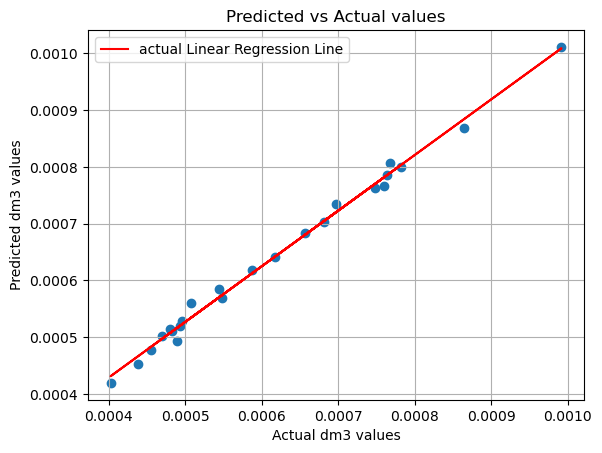

In [905]:
# fitting best fit line
slope1, intercept1 = np.polyfit(modelled_group.dm3, modelled_group.preds, 1)
regression_line1 = slope1 * modelled_group.dm3 + intercept1


plt.scatter(x=modelled_group.dm3, y = modelled_group.preds)
plt.plot(modelled_group.dm3, regression_line1, color='red', label="actual Linear Regression Line")
plt.title("Predicted vs Actual values")
plt.xlabel("Actual dm3 values")
plt.ylabel("Predicted dm3 values")
plt.grid()
plt.legend()
plt.show()

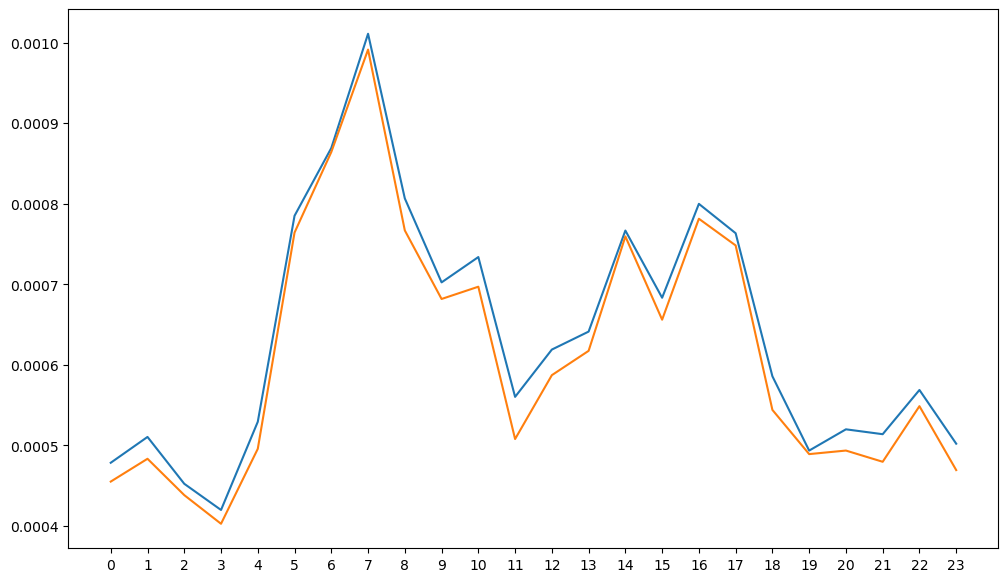

In [906]:
#Visualization
fig, ax = plt.subplots(figsize=(12,7))

ax.plot(modelled_group.Hour, modelled_group.preds, label="preds")
ax.plot(modelled_group.Hour, modelled_group.dm3, label = "actual")
ax.set_xticks(np.arange(0, 24, step=1))
plt.show()

In [907]:
# Key-in the inputs
bio_id = float(input("bio id: "))
phase_test = float(input("phase test: "))
Month = float(input("Month: "))
Hour = float(input("hour: "))
gas_temp = float(input("Gas Temperatures: "))
air_umidity = float(input("air humidity"))
gas_umidity = float(input("gas humidity"))
air_temp = float(input("gair_temp"))
ground_temp = float(input("gground_temp"))
fluid_temp = float(input("fluid_temp"))

bio id: 


ValueError: could not convert string to float: ''

In [908]:
inputs = pd.DataFrame({ "fluid_temp" : [fluid_temp], "ground_temp" : [ground_temp], "air_umidity":[air_umidity],  "air_temp"  : [air_temp],'gas_umidity' : [gas_umidity],  'gas_temp' : [gas_temp],    "bio_id": [bio_id], "phase_test": [phase_test] , "Month" : [Month], "Hour" : [Hour], })

In [909]:
inputs

,fluid_temp,ground_temp,air_umidity,air_temp,gas_umidity,gas_temp,bio_id,phase_test,Month,Hour
0,67.0,72.0,43.0,65.0,39.0,45.0,1.0,3.0,8.0,7.0


In [910]:
inputs_log = np.log(inputs)

In [911]:
inputs_log

,fluid_temp,ground_temp,air_umidity,air_temp,gas_umidity,gas_temp,bio_id,phase_test,Month,Hour
0,4.204693,4.276666,3.7612,4.174387,3.663562,3.806662,0.0,1.098612,2.079442,1.94591


In [912]:
#predictng on the large dataset "train dataset"
pred1 = rfr_model.predict(inputs_log)

In [913]:
print(round(pred1[0],5))

0.00272


## Model 2

In [914]:
df = pd.read_csv("biogasdf_ready.csv", parse_dates=['date'])
df['Month'] = df['date'].dt.month
df['Hour'] = pd.to_datetime(df['hour'], format='%H:%M:%S').dt.hour

In [915]:
df_hour = df.groupby('hour').mean().reset_index()

In [916]:
df_hour = df_hour.fillna(0)
df_hour.head()

,hour,date,fluid_temp,ground_temp,air_umidity,air_temp,gas_umidity,gas_temp,dm3_gas,bio_id,phase_test,Month,Hour
0,00:00:00,2021-11-08 00:00:00,18.942500,-17.657500,94.35,15.300000,90.0925,14.8275,0.000,1.500000,1.000000,11.000000,0.0
1,00:00:02,2022-05-14 00:00:00,20.090000,18.905000,95.90,14.500000,0.0000,0.0000,0.000,1.500000,3.000000,5.000000,0.0
2,00:00:03,2022-01-04 08:00:00,21.563333,21.836667,99.50,15.366667,84.5800,16.4700,0.000,1.333333,0.666667,4.666667,0.0
3,00:00:08,2022-06-26 00:00:00,17.130000,15.785000,93.90,13.500000,0.0000,0.0000,0.005,1.500000,3.000000,6.000000,0.0
4,00:00:16,2021-12-21 00:00:00,22.440000,22.120000,91.60,17.400000,0.0000,0.0000,0.000,1.500000,1.000000,12.000000,0.0


In [917]:
X_2 = df_hour[['fluid_temp', 'air_umidity']]
y_2  = df_hour['dm3_gas']

In [918]:
print(X_2.shape)
X_2.head(3)

(20559, 2)


,fluid_temp,air_umidity
0,18.942500,94.35
1,20.090000,95.90
2,21.563333,99.50


In [919]:
y_2.shape

(20559,)

In [920]:
X_2_log = np.log(X_2)

C:\Users\bency\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [921]:
X_2_log = X_2_log.fillna(0)

In [922]:
X_2_log = X_2_log.replace(-np.inf, 0)

In [923]:
print(X_2_log.shape)
X_2_log.head(3)

(20559, 2)


,fluid_temp,air_umidity
0,2.941408,4.547011
1,3.000222,4.563306
2,3.070994,4.600158


In [924]:
X_train_2, X_test_2,y_train_2,  y_test_2 = train_test_split(X_2_log, y_2, test_size=0.3, random_state=42)
X_train_2.shape, X_test_2.shape,  y_train_2.shape, y_test_2.shape

((14391, 2), (6168, 2), (14391,), (6168,))

In [926]:
# iteratng through several models to get the best performing one.

models = {
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(max_depth=3, random_state=42),
    "Ridge": Ridge(alpha=1),
    "Lasso": Lasso(alpha=1)
}

for name, model in models.items():
    model.fit(X_train_2, y_train_2)
    print(f"{name}: {model.score(X_train_2, y_train_2)}")

RandomForestRegressor: 0.712448147172261
DecisionTreeRegressor: 0.0726267077497258
Ridge: 0.010070531789463266
Lasso: 0.0


In [927]:
rfr = RandomForestRegressor()
rfr_model = rfr.fit(X_train_2, y_train_2)
print(mean_absolute_error(rfr_model.predict(X_train_2), y_train_2))

0.00040942104099811856


#### Saving the model

In [928]:
import pickle
with open('rfc_model3.pkl', 'wb') as f:
    pickle.dump(rfr_model, f)

In [929]:
pred2 = rfr_model.predict(X_2_log)

In [930]:
modelled2 = pd.DataFrame({'pred2' : pred2, 
                        'Hour' : df_hour.Hour,
                        'dm3' : y_2}
                )

In [931]:
modelled2_group = modelled2.groupby('Hour').mean().reset_index()
modelled2_group.to_csv("modelled2_group.csv", index=False)

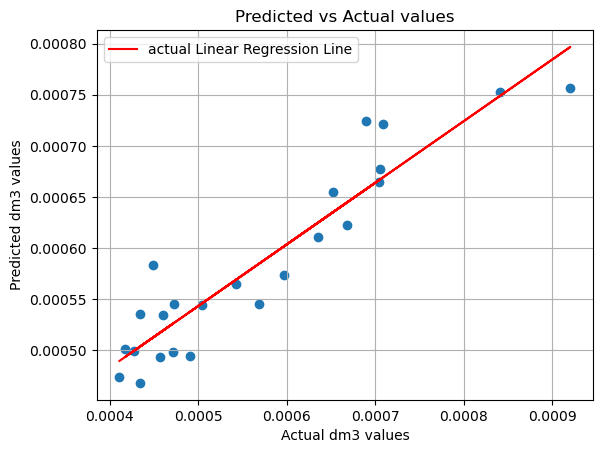

In [932]:
# fitting best fit line
slope1, intercept1 = np.polyfit(modelled2_group.dm3, modelled2_group.pred2, 1)
regression_line1 = slope1 * modelled2_group.dm3 + intercept1


plt.scatter(x=modelled2_group.dm3, y = modelled2_group.pred2)
plt.plot(modelled2_group.dm3, regression_line1, color='red', label="actual Linear Regression Line")
plt.title("Predicted vs Actual values")
plt.xlabel("Actual dm3 values")
plt.ylabel("Predicted dm3 values")
plt.grid()
plt.legend()
plt.show()

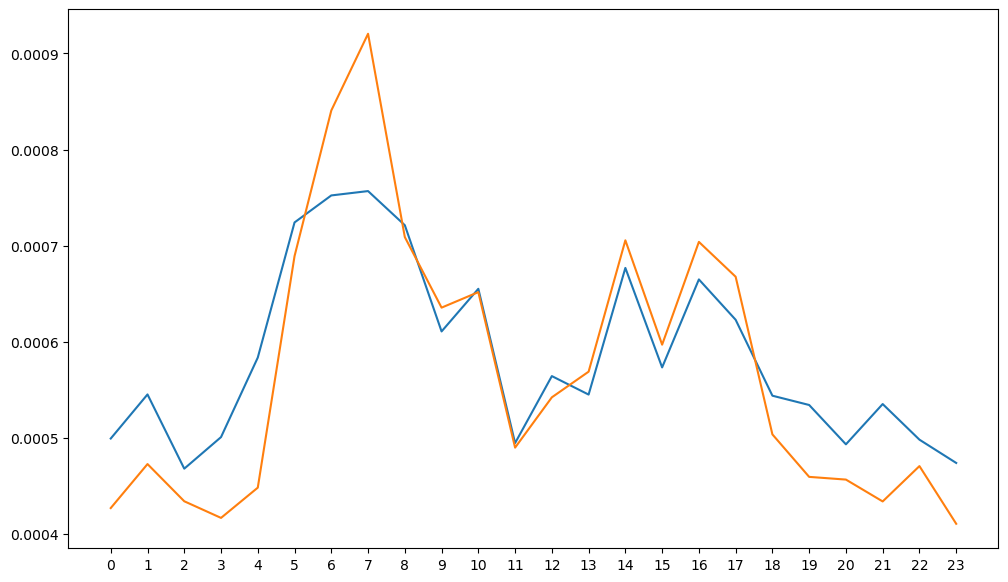

In [933]:
#Visualization
fig, ax = plt.subplots(figsize=(12,7))

ax.plot(modelled2_group.Hour, modelled2_group.pred2, label="preds")
ax.plot(modelled2_group.Hour, modelled2_group.dm3, label = "actual")
ax.set_xticks(np.arange(0, 24, step=1))
plt.show()

In [934]:
fluid_temp = float(input("Fluid_temperature: "))
air_umidity = float(input("Air_umidity: "))

Fluid_temperature: 


ValueError: could not convert string to float: ''

In [935]:
input2 = pd.DataFrame({"fluid_temp" : [fluid_temp], "air_umidity" : [air_umidity]})

In [936]:
input2

,fluid_temp,air_umidity
0,67.0,43.0


In [937]:
input2_log = np.log(input2)

In [938]:
input2_log

,fluid_temp,air_umidity
0,4.204693,3.7612


In [939]:
sample2 = rfr_model.predict(input2_log)

In [940]:
round(sample2[0], 5)

0.00415

In [ ]:
*********      RIDGE              *******************************

In [850]:
from sklearn.linear_model import Ridge, Lasso

In [851]:
ridge = Ridge(alpha=1)
lasso = Lasso(alpha=1)

In [855]:
ridge = ridge.fit(X_train_2, y_train_2)
lasso = lasso.fit(X_train_2, y_train_2)

In [856]:
y_pred_ridge = ridge.predict(X_test_2)
y_pred_lasso = lasso.predict(X_test_2)

In [854]:
mse_ridge = mean_squared_error(y_test_2, y_pred_ridge)
mse_lasso = mean_squared_error(y_test_2, y_pred_lasso)
print("Mean Squared Error (Ridge):", mse_ridge)
print("Mean Squared Error (Lasso):", mse_lasso)

Mean Squared Error (Ridge): 2.5741383567172064e-06
Mean Squared Error (Lasso): 2.5967866012543833e-06


# ANOVA

In [841]:
df = pd.read_csv("biogasdf_ready.csv", parse_dates=['date'])
df['Month'] = df['date'].dt.month
df['Hour'] = pd.to_datetime(df['hour'], format='%H:%M:%S').dt.hour

In [842]:
df = df.drop(columns = ["date", "hour"])

In [843]:
df.head()

,fluid_temp,ground_temp,air_umidity,air_temp,gas_umidity,gas_temp,dm3_gas,bio_id,phase_test,Month,Hour
0,14.81,14.69,66.7,18.8,84.50,16.93,0.0,1,0,8,22
1,14.88,14.69,78.3,18.0,84.45,15.83,0.0,1,0,8,23
2,14.88,14.69,83.2,17.4,84.35,15.22,0.0,1,0,8,0
3,14.88,14.69,84.8,16.7,84.15,14.58,0.0,1,0,8,0
4,14.88,14.69,87.4,16.0,84.10,14.18,0.0,1,0,8,0


In [849]:
import pandas as pd
from scipy.stats import f_oneway

# Select the columns you want to analyze (e.g., fluid_temp, ground_temp, air_umidity)
selected_columns = ['fluid_temp', 'ground_temp', 'air_umidity', "air_temp", "gas_umidity", "gas_temp", "bio_id", "phase_test", "Month","Hour"]

anova_results = {'Column': [], 'F-statistic': [], 'p-value': []}

# Perform ANOVA for each selected column
for col in selected_columns:
    groups = []  # List to store the data for each group
    categories = df['dm3_gas'].unique()  # Assuming we want to analyze based on 'dm3_gas' for now

    for category in categories:
        group_data = df[df['dm3_gas'] == category][col]
        groups.append(group_data)

    # Perform ANOVA
    f_statistic, p_value = f_oneway(*groups)
    
    #Print the results for each column
    print(f"ANOVA results for '{col}':")
    print("F-statistic:", f_statistic)
    print("p-value:", p_value)
    print("\n")

    anova_results['Column'].append(col)
    anova_results['F-statistic'].append(f_statistic)
    anova_results['p-value'].append(p_value)
    
anova_plain = pd.DataFrame(anova_results)
anova_plain =  anova_df.fillna(0)

ANOVA results for 'fluid_temp':
F-statistic: 97.25048160407168
p-value: 6.452735577661749e-23


ANOVA results for 'ground_temp':
F-statistic: 64.3438423670589
p-value: 1.0705680579605237e-15


ANOVA results for 'air_umidity':
F-statistic: 136.63628375332712
p-value: 1.6124486699916627e-31


ANOVA results for 'air_temp':
F-statistic: 8.076217270225412
p-value: 0.004487058740138282


ANOVA results for 'gas_umidity':
F-statistic: nan
p-value: nan


ANOVA results for 'gas_temp':
F-statistic: nan
p-value: nan


ANOVA results for 'bio_id':
F-statistic: 752.7906407709883
p-value: 2.4148110316074167e-164


ANOVA results for 'phase_test':
F-statistic: 1558.0180712996014
p-value: 0.0


ANOVA results for 'Month':
F-statistic: 557.3942048220734
p-value: 1.7964642849312632e-122




KeyError: 'Hour'

In [845]:
anova_plain.to_csv("anova_plain.csv", index=False)

### Using hourly grouped values

In [846]:
df = pd.read_csv("biogasdf_ready.csv", parse_dates=['date'])
df['Month'] = df['date'].dt.month
#df['Hour'] = pd.to_datetime(df['hour'], format='%H:%M:%S').dt.hour
df_hour = df.groupby('hour').mean().reset_index()

In [350]:
df_hour = df_hour.drop(columns = ["date", "hour"])

In [351]:
import pandas as pd
from scipy.stats import f_oneway

# Select the columns you want to analyze (e.g., fluid_temp, ground_temp, air_umidity)
selected_columns = ['fluid_temp', 'ground_temp', 'air_umidity', "air_temp", "gas_umidity", "gas_temp", "bio_id", "phase_test", "Month"]

anova_results = {'Column': [], 'F-statistic': [], 'p-value': []}


# Perform ANOVA for each selected column
for col in selected_columns:
    groups = []  # List to store the data for each group
    categories = df_hour['dm3_gas'].unique()  # Assuming we want to analyze based on 'dm3_gas' for now

    for category in categories:
        group_data = df_hour[df_hour['dm3_gas'] == category][col]
        groups.append(group_data)

    # Perform ANOVA
    f_statistic, p_value = f_oneway(*groups)
    
    # Print the results for each column
    print(f"ANOVA results for '{col}':")
    print("F-statistic:", f_statistic)
    print("p-value:", p_value)
    print("\n")
    anova_results['Column'].append(col)
    anova_results['F-statistic'].append(f_statistic)
    anova_results['p-value'].append(p_value)
    
anova_hour = pd.DataFrame(anova_results)
anova_hour =  anova_df.fillna(0)

ANOVA results for 'fluid_temp':
F-statistic: 9.620235990117884
p-value: 9.670027827669945e-22


ANOVA results for 'ground_temp':
F-statistic: 9.122320175187872
p-value: 2.2602493340110713e-20


ANOVA results for 'air_umidity':
F-statistic: 8.589242018893147
p-value: 6.482801869722251e-19


ANOVA results for 'air_temp':
F-statistic: 4.535745539675785
p-value: 2.9220128498051542e-08


ANOVA results for 'gas_umidity':
F-statistic: nan
p-value: nan


ANOVA results for 'gas_temp':
F-statistic: nan
p-value: nan


ANOVA results for 'bio_id':
F-statistic: 48.16077373705148
p-value: 1.4911457074647116e-132


ANOVA results for 'phase_test':
F-statistic: 131.77150982658185
p-value: 0.0


ANOVA results for 'Month':
F-statistic: 35.37459581146053
p-value: 1.5475459140684477e-95




In [352]:
anova_hour.to_csv("anova_hour.csv", index=False)

In [353]:
anova_hour['p-value'] = round(anova_hour['p-value'],5)
anova_hour['F-statistic'] = round(anova_hour['F-statistic'],5)

In [354]:
anova_hour

,Column,F-statistic,p-value
0,fluid_temp,9.62024,0.00000
1,ground_temp,9.12232,0.00000
2,air_umidity,8.58924,0.00000
3,air_temp,4.53575,0.00000
4,gas_umidity,0.00000,0.00000
5,gas_temp,0.00000,0.00000
6,bio_id,48.16077,0.00000
7,phase_test,131.77151,0.00000
8,Month,35.37460,0.00000
9,Hour,1.08293,0.36732


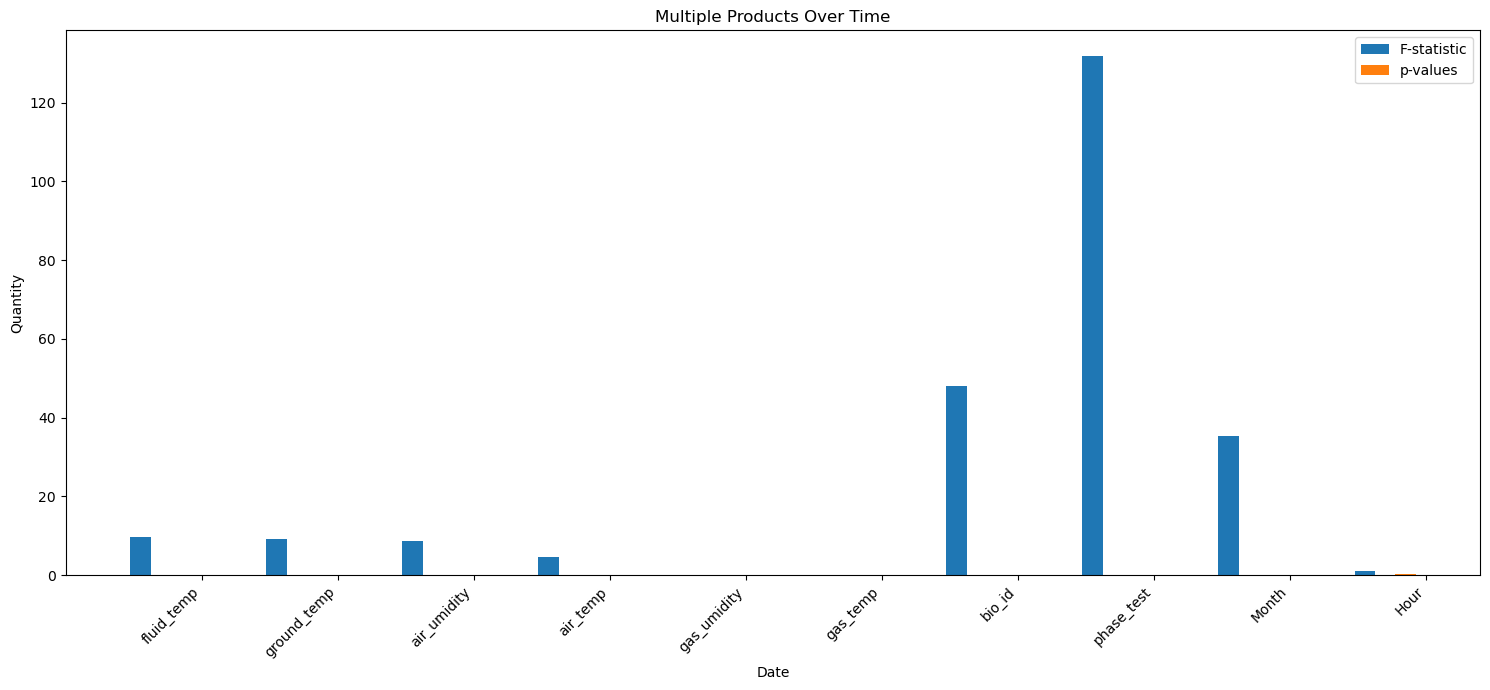

In [318]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 7))

# Define the width of each bar
bar_width = 0.15  # Adjust the bar width as needed

# Create x-values for the bars for the first set of data
x1 = range(len(anova_hour.Column))

# Create x-values for each set of bars
x2_f = [x + bar_width for x in x1]
x2_p = [x + 2 * bar_width for x in x1]

# Plot the first set of bars
ax.bar(x1, anova_hour["F-statistic"], width=bar_width, label='F-statistic')

# Plot the second set of bars
ax.bar(x2_p, anova_hour["p-value"], width=bar_width, label='p-values')


# Set the x-axis labels to be the dates
ax.set_xticks([x + 3 * bar_width for x in x1])
ax.set_xticklabels(anova_hour.Column, rotation=45, ha='right')

# Add a legend
ax.legend()

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Quantity')
ax.set_title('Multiple Products Over Time')

# Show the plot
plt.tight_layout()
plt.show()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'fluid_temp'),
  Text(1, 0, 'ground_temp'),
  Text(2, 0, 'air_umidity'),
  Text(3, 0, 'air_temp'),
  Text(4, 0, 'gas_umidity'),
  Text(5, 0, 'gas_temp'),
  Text(6, 0, 'bio_id'),
  Text(7, 0, 'phase_test'),
  Text(8, 0, 'Month'),
  Text(9, 0, 'Hour')])

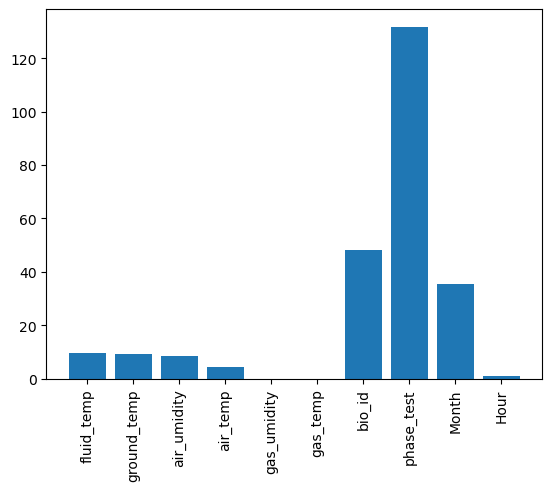

In [320]:
plt.bar(anova_hour["Column"], anova_hour["F-statistic"])
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'fluid_temp'),
  Text(1, 0, 'ground_temp'),
  Text(2, 0, 'air_umidity'),
  Text(3, 0, 'air_temp'),
  Text(4, 0, 'gas_umidity'),
  Text(5, 0, 'gas_temp'),
  Text(6, 0, 'bio_id'),
  Text(7, 0, 'phase_test'),
  Text(8, 0, 'Month'),
  Text(9, 0, 'Hour')])

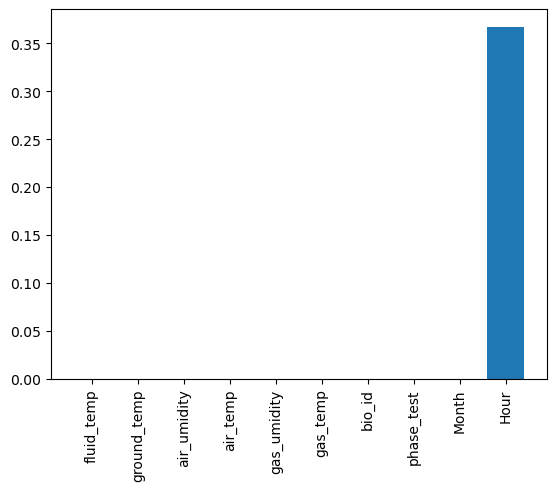

In [321]:
plt.bar(anova_hour["Column"], anova_hour["p-value"])
plt.xticks(rotation=90)